In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# FFNN

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
# target : 10000000
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True) # 다운로드 위치
import tensorflow as tf

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# 128장의 이미지를 random 하게 공급
batch_x, batch_y = mnist.train.next_batch(128)
print(batch_x.shape) # 128장 * 784(가로x세로) 이미지가 일렬로 들어왔다(flatten). 28x28
learning_rate = 0.1 # hyper parameter
num_steps = 500 # epoch 세대
batch_size = 128 # mini batch 이유 : 속도를 높이고, 지역해 문제 극복
display_step =100 # 데이터 시각화

(128, 784)


In [5]:
# 히든 에이러가 2개
# 784(픽셀 1개를 변수로 ) => 784x256 -> 256x256 -> 256x10
n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784
num_classes = 10 # target 0 ~ 9
X = tf.placeholder('float', [None, num_input]) # 128 x 784
Y = tf.placeholder('float', [None, num_classes]) # 128 x 10

In [6]:
# 가중치 : 설명렬, 계수
weights = {
    # 784x256
    'h1':tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    # 256x256
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    # 256x10
    'out':tf.Variable(tf.random_normal([n_hidden_2, num_classes])),
}

# bias : activation
biases = {
    # 256, 변수 개수 만큼
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    # 256
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    # 10
    'out':tf.Variable(tf.random_normal([num_classes])),
}

In [7]:
def neural_net(x):
    # 128x784, 784x256 => 128x256 전달 데이터 (tensor)
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # 128x256, 256x256 => 128x256
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # 128x256, 256x10
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

In [8]:
logits = neural_net(X)
# 원하인코드된 값 * log(확률값)
# 경사하강법 -> 미분가능 -> 분류
# softmat 확률값으로 계산
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels=Y))

# 최적화기 : 기울기,  학숩율
# adagrad : learning-rate 처음엔 크게 -> 점점 작게 끝나지않아도 0으로 만든다
# momentum + propgrad() : adaptive 적응적으로 현재 상태를 보고
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 가장큰값의 인덱스를 구함(one-hot-encoding) => target
# ture, false => 0,1로 나온다
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))

# 형번환
# 합을 평균함
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
# 초기화
init = tf.global_variables_initializer()

In [9]:
with tf.Session() as sess: # GPU 네트워크 연결 => 일반화
    sess.run(init)
    for step in range(1, num_steps+1): # epoch
        # 128x784, 128x10
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        if step % display_step ==0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X:batch_x, Y:batch_y})
            print('Step'+str(step)+'Minibatch Loss  : {:.4f}'.format(loss)+', Training Accuracy : {:.3f}'.format(acc))
    print('테스트 정확도 : \n',sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Step1Minibatch Loss  : 7101.0884, Training Accuracy : 0.375
Step100Minibatch Loss  : 231.6958, Training Accuracy : 0.906
Step200Minibatch Loss  : 172.1407, Training Accuracy : 0.844
Step300Minibatch Loss  : 126.9118, Training Accuracy : 0.867
Step400Minibatch Loss  : 44.7057, Training Accuracy : 0.883
Step500Minibatch Loss  : 35.3235, Training Accuracy : 0.906
테스트 정확도 : 
 0.8595


In [10]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import tensorflow as tf
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['const'] = np.ones(df.shape[0]) # 전부 1 이라는 변수 추가
df.tail()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [2]:
n,m =df.shape
X = tf.placeholder(tf.float64, shape=(n,m))
y = tf.placeholder(tf.float64, shape=(n,1))
XT = tf.transpose(X)
XT.shape, X


NameError: name 'df' is not defined

In [12]:
# 행렬식
# 거듭제곱 : 상관계수 506(data point) x 14(변수)
# 14x506, 506x14 => 14x14 =. 상관행렬 => 
# 14x14, 14x506 => 14x 506
# 14x506,506x1 => 14x1
# 역행렬을 이용해서 가중치 결정
# y = ax => 
# a = y/x # 변수간의 관계 => 역행렬
w = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT),y)
y_pred = tf.matmul(X,w) # 506x14, 14x1 => 506x1 회귀식
with tf.Session() as sess:
    y_pred_ = sess.run(y_pred, feed_dict={X:df.values, y:boston.target.reshape(-1,1)})

print('예측한 집값 : ', y_pred_[19], ', 실제 집값 : ', boston.target[19])

예측한 집값 :  [18.40613603] , 실제 집값 :  18.2


In [13]:
import tensorflow as tf
sess = tf.Session()

val = [0,2,3]
val = tf.tile(val, [5]) # 몇개의 타일에 쌀것인가?

print('홑일 때', sess.run(val))

홑일 때 [0 2 3 0 2 3 0 2 3 0 2 3 0 2 3]


In [14]:
# 타일은 차원을 확대하지 않음
val = [[1,1,1],[2,2,2],[3,3,3]] # 3x3
val = tf.tile(val, [5,2]) # 5행, 2열로 => 15x6
print('2차원일때\n', sess.run(val))

2차원일때
 [[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]]


In [15]:
input_vecs = [[1.,2.],[2.,1.],[-2.,-1]]
tiled_vecs = tf.tile(input_vecs, [1,3])
print(sess.run(tiled_vecs))
tiled_vecs = tf.tile(input_vecs, [2,3])
print(sess.run(tiled_vecs))


[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]
[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]
 [ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]


# tile

In [16]:
# kmeans : k가 결정되야한다. => 중심이 발생
# - 각 데이터의 중심값을 빼서 거리값을 계산
# - 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import scale
from tensorflow.python.framework import ops
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()
iris = datasets.load_iris() # 4개의 변수와 target

In [18]:
num_pts = len(iris.data) # 행수
num_feats = len(iris.data[0]) # columns 개수
k = 3 # 군집수
generations = 25 # epoch

data_points = tf.Variable(iris.data)

# 레이블 변수
cluster_labels = tf.Variable(tf.zeros([num_pts], dtype=tf.int64))

# 중심데이터를 랜덤으로 취함
# 중심의 열변수 개수 -> 4개
rand_starts = np.array([iris.data[np.random.choice(len(iris.data))] for _ in range(k)])

# 중심
centroids = tf.Variable(rand_starts)
# reshape(150, 3, 4)
centroid_matirx = tf.reshape(tf.tile(centroids, [num_pts, 1]), [num_pts, k, num_feats])

# 결국 150x12(4개의 변수가 3번더) => reshape(150, 3, 4)
point_matrix = tf.reshape(tf.tile(data_points, [1,k]), [num_pts, k, num_feats])

# 열중심으로 한번에 뺀다.
distances = tf.reduce_sum(tf.square(point_matrix - centroid_matirx), axis=2)

# 중심거리1, 중심거리2, 중심거리3
# argmin : 2개 전제(인덱스, 실제값비교)
centroid_group = tf.argmin(distances, 1)

In [20]:
# 그룹별로 거리의 평균
# 중심거리를 재계선해서 중심값을 재할당
def data_group_avg(group_ids, data ):
    # 라벨번호로 값의 합계 : 라벨 - 값, 그룹이 3개
    sum_total =tf.unsorted_segment_sum(data, group_ids, 3)
    # 그룹의 전체 개수
    num_total = tf.unsorted_segment_sum(tf.ones_like(data), group_ids, 3)
    # 그룹의 평균거리
    avg_by_group = sum_total / num_total
#     print('sum \n',sess.run(sum_total))
#     print('num \n',sess.run(num_total))
    return avg_by_group

means = data_group_avg(centroid_group, data_points)
# 업데이트 node를 결정
update = tf.group(centroids.assign(means), cluster_labels.assign(centroid_group))
# 초기화
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
# 실행의 마지막 결과값 _
for i in range(generations):
    print('Calculating gen {}, out of {}'.format(i, generations))
    # centroid_group : 그룹번호가 결정
    # update : 군집의 중심값을 재계산하고 그룹을 변경
    _, centroid_group_count = sess.run([update, centroid_group])
    group_count = []
    
    for ix in range(k):# 군집별 카운트
        group_count.append(np.sum(centroid_group_count == ix))
        
    print('Group counts : {}'.format(group_count))

# 결정된 중심값, 할당된 군집번호
[centers, assignments] = sess.run([centroids, cluster_labels])

Calculating gen 0, out of 25
Group counts : [36, 34, 80]
Calculating gen 1, out of 25
Group counts : [32, 63, 55]
Calculating gen 2, out of 25
Group counts : [35, 64, 51]
Calculating gen 3, out of 25
Group counts : [37, 63, 50]
Calculating gen 4, out of 25
Group counts : [38, 62, 50]
Calculating gen 5, out of 25
Group counts : [38, 62, 50]
Calculating gen 6, out of 25
Group counts : [38, 62, 50]
Calculating gen 7, out of 25
Group counts : [38, 62, 50]
Calculating gen 8, out of 25
Group counts : [38, 62, 50]
Calculating gen 9, out of 25
Group counts : [38, 62, 50]
Calculating gen 10, out of 25
Group counts : [38, 62, 50]
Calculating gen 11, out of 25
Group counts : [38, 62, 50]
Calculating gen 12, out of 25
Group counts : [38, 62, 50]
Calculating gen 13, out of 25
Group counts : [38, 62, 50]
Calculating gen 14, out of 25
Group counts : [38, 62, 50]
Calculating gen 15, out of 25
Group counts : [38, 62, 50]
Calculating gen 16, out of 25
Group counts : [38, 62, 50]
Calculating gen 17, out 

In [22]:
# set 키의 중복을 불허한다. 
def most_common(my_list): # 대표성을 띈 라벨을 결정
    return (max(set(my_list), key = my_list.count))

label0 = most_common(list(assignments[0:50])) # 라벨링
label1 = most_common(list(assignments[50:100]))
label2 = most_common(list(assignments[100:150]))

group0_count = np.sum(assignments[0:50] == label0)
group1_count = np.sum(assignments[50:100] == label1)
group2_count = np.sum(assignments[100:150] == label2)

accracy = (group0_count + group1_count + group2_count)/ 150
print('Accracy : {:.2f}'.format(accracy)) # 

Accracy : 0.89


In [23]:
import csv
import random
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [24]:
response = 6
batch_size = 50
symmetry = ['rotate180', 'rotate90', 'rotate270','flip_v','flip_h']

In [25]:
# 말판
def print_board(board):
    symbols = ['O', ' ', 'X']
    board_plus1 = [int(x) + 1 for x in board]
    board_line1 = ' {} | {} | {}'.format(symbols[board_plus1[0]],
                                         symbols[board_plus1[1]],
                                         symbols[board_plus1[2]])
    board_line2 = ' {} | {} | {}'.format(symbols[board_plus1[3]],
                                         symbols[board_plus1[4]],
                                         symbols[board_plus1[5]])
    board_line3 = ' {} | {} | {}'.format(symbols[board_plus1[6]],
                                         symbols[board_plus1[7]],
                                         symbols[board_plus1[8]])
    print(board_line1)
    print('___________')
    print(board_line2)
    print('___________')
    print(board_line3)

In [26]:
def get_symmetry(board, play_response, transformation):
    if transformation == 'rotate180':
        new_response = 8 - play_response
        return board[::-1], new_response
    elif transformation == 'rotate90':
        new_response = [6, 3, 0, 7, 4, 1, 8, 5, 2].index(play_response)
        tuple_board = list(zip(*[board[6:9], board[3:6], board[0:3]]))
        return [value for item in tuple_board for value in item], new_response
    elif transformation == 'rotate270':
        new_response = [2, 5, 8, 1, 4, 7, 0, 3, 6].index(play_response)
        tuple_board = list(zip(*[board[0:3], board[3:6], board[6:9]]))[::-1]
        return [value for item in tuple_board for value in item], new_response
    elif transformation == 'flip_v':
        new_response = [6, 7, 8, 3, 4, 5, 0, 1, 2].index(play_response)
        return board[6:9] + board[3:6] + board[0:3], new_response
    elif transformation == 'flip_h':  # flip_h = rotate180, then flip_v
        new_response = [2, 1, 0, 5, 4, 3, 8, 7, 6].index(play_response)
        new_board = board[::-1]
        return new_board[6:9] + new_board[3:6] + new_board[0:3], new_response
    else:
        raise ValueError('해당하는 경우가 없음')



In [27]:
# 화일로 부터 말규칙 로딩
def get_moves_from_csv(csv_file):
    moves = []
    with open(csv_file, 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            moves.append(([int(x) for x in row[0:9]], int(row[9])))
        return moves

In [28]:
def get_rand_move(moves, n=1, rand_transforms=2):
    (board, response) = random.choice(moves)
    possible_transforms = ['rotate90','rotate180','rotate270', 'flip_v','flip_h']
    for i in range(rand_transforms):
        random_transform = random.choice(possible_transforms)
        (board, response) = get_symmetry(board, response, random_transform)
        return (board, response)


In [29]:
moves = get_moves_from_csv('tictactoe_moves.csv')
train_length = 500
train_set = []
for t in range(train_length):
    train_set.append(get_rand_move(moves))

In [30]:
def init_weights(shape):
    return (tf.Variable(tf.random_normal(shape)))

In [31]:
def model(X, A1, A2, bias1, bias2):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X,A1), bias1))
    layer2 = tf.add(tf.matmul(layer1, A2), bias2)
    return layer2

In [32]:
X = tf.placeholder(dtype = tf.float32, shape=[None, 9])
Y = tf.placeholder(dtype=tf.int32, shape=[None])
A1 = init_weights([9,81])
bias1 = init_weights([81])
A2 = init_weights([81,9])
bias2 = init_weights([9])
model_output = model(X,A1,A2,bias1,bias2)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = model_output, labels=Y))
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
prediction = tf.argmax(model_output, 1)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [33]:
loss_vec = []
for i in range(100000):
    rand_indices = np.random.choice(range(len(train_set)), batch_size, replace=False)
    batch_data = [train_set[i] for i in rand_indices]
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data])
    sess.run(train_step, feed_dict={X: x_input, Y: y_target})
    
    temp_loss = sess.run(loss, feed_dict={X: x_input, Y: y_target})
    loss_vec.append(temp_loss)
    if i % 500 == 0:
        print('Iteration: {}, Loss: {}'.format(i, temp_loss))

Iteration: 0, Loss: 6.986211776733398
Iteration: 500, Loss: 1.7031941413879395
Iteration: 1000, Loss: 1.3662972450256348
Iteration: 1500, Loss: 1.19367516040802
Iteration: 2000, Loss: 0.9691966772079468
Iteration: 2500, Loss: 1.0101118087768555
Iteration: 3000, Loss: 1.037035346031189
Iteration: 3500, Loss: 1.0503621101379395
Iteration: 4000, Loss: 0.817331075668335
Iteration: 4500, Loss: 0.7996972799301147
Iteration: 5000, Loss: 0.6878639459609985
Iteration: 5500, Loss: 0.7973970174789429
Iteration: 6000, Loss: 0.7536744475364685
Iteration: 6500, Loss: 0.8542159199714661
Iteration: 7000, Loss: 0.5156900882720947
Iteration: 7500, Loss: 0.6542292833328247
Iteration: 8000, Loss: 0.6379768252372742
Iteration: 8500, Loss: 0.5652735829353333
Iteration: 9000, Loss: 0.6734757423400879
Iteration: 9500, Loss: 0.6570013165473938
Iteration: 10000, Loss: 0.493992418050766
Iteration: 10500, Loss: 0.47240498661994934
Iteration: 11000, Loss: 0.5034415125846863
Iteration: 11500, Loss: 0.51876199245452

Iteration: 95000, Loss: 0.20412322878837585
Iteration: 95500, Loss: 0.2752665877342224
Iteration: 96000, Loss: 0.25387898087501526
Iteration: 96500, Loss: 0.3677823543548584
Iteration: 97000, Loss: 0.18385501205921173
Iteration: 97500, Loss: 0.3337751626968384
Iteration: 98000, Loss: 0.2656726837158203
Iteration: 98500, Loss: 0.2652973234653473
Iteration: 99000, Loss: 0.3478681147098541
Iteration: 99500, Loss: 0.3774758279323578


In [34]:
test_board = [-1,0,0,1,-1,-1,0,0,1]
train_set = [x for x in train_set if x[0] != test_board]

In [35]:
# 게임 승패 결정
def check(board):
    wins = [[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8],[0,4,8],[2,4,6]]
    for i in range(len(wins)):
        if board[wins[i][0]] == board[wins[i][1]] == board[wins[i][2]] == 1.:
            return 1
        elif board[wins[i][0]] == board[wins[i][1]] == board[wins[i][2]] == -1.:
            return -1
    return 0

In [36]:
game_tracker = [0.,0.,0.,0.,0.,0.,0.,0.,0.]
win_logical = False
num_moves = 0
while not win_logical:
    player_index = input('이동하고 싶은 인덱스를 입력하시오 (0 ~ 8) : ')
    num_moves +=1 
    game_tracker[int(player_index)] = 1.
    [potential_moves] = sess.run(model_output, feed_dict={X:[game_tracker]})
    allowed_moves = [ix for ix,x in enumerate(game_tracker) if x ==0.0]
    model_move = np.argmax([x if ix in allowed_moves else -999.0 for ix,x in enumerate(potential_moves)])
    
    game_tracker[int(model_move)] = -1.
    print('모델이 이동하였습니다.')
    print_board(game_tracker)
    if check(game_tracker) == 1 or num_moves>=20:
        print('게임 종료! 승리하였습니다.')
        win_logical = True
    elif check(game_tracker) == -1:
        print('게임 종료! 게임에 지셨습니다.')
        win_logical = True

이동하고 싶은 인덱스를 입력하시오 (0 ~ 8) : 5
모델이 이동하였습니다.
   |   | O
___________
   |   | X
___________
   |   |  
이동하고 싶은 인덱스를 입력하시오 (0 ~ 8) : 4
모델이 이동하였습니다.
   |   | O
___________
   | X | X
___________
 O |   |  
이동하고 싶은 인덱스를 입력하시오 (0 ~ 8) : 3
모델이 이동하였습니다.
   |   | O
___________
 X | X | X
___________
 O | O |  
게임 종료! 승리하였습니다.


# CNN

In [38]:
import os
def save_fig(fig_id, tight_layout=True):
    path = os.path.join('./images/', fig_id + '.png')
    print('Saveing figure', fig_id)
    if tight_layout:
        plt.tilght_layout()
    plt.savefig(path, format='png', dpi=300) # dot per inch

In [39]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [40]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')

# 70(높이:행), 120(가로:열)
image = china[150:220, 130:250] # clipping
height, width, channels = image.shape
# 0 ~ 255
# axis=2 : channels => 컬러
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1,height,width,1)

In [41]:
# 흑백
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest') # qhrks
    plt.axis('off') # 이미지 축생략

# 컬러
def plot_color_image(image):
    plt.imshow(image.astype(np.unit8), interpolation='nearest')
    plt.axis('off')

In [42]:
# 필터 (필터의 높이, 필터의 가로, 입력 채널, 출력 채널)
# 필터 2개 
import numpy as np
fmap = np.zeros(shape=(7,7,1,2), dtype=np.float32)
fmap[:,3,0,0]=1
fmap[3,:,0,1]=1
fmap[:,2,0,0]=2
fmap[2,:,0,1]=2
fmap[:,:,0,0]

array([[0., 0., 2., 1., 0., 0., 0.],
       [0., 0., 2., 1., 0., 0., 0.],
       [0., 0., 2., 1., 0., 0., 0.],
       [0., 0., 2., 1., 0., 0., 0.],
       [0., 0., 2., 1., 0., 0., 0.],
       [0., 0., 2., 1., 0., 0., 0.],
       [0., 0., 2., 1., 0., 0., 0.]], dtype=float32)

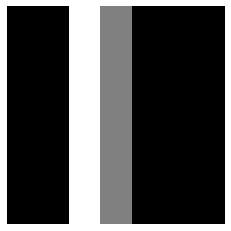

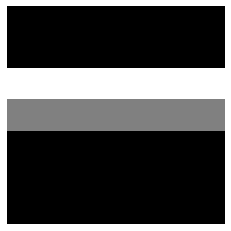

[[0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]]


In [43]:
plot_image(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1])
plt.show()
print(fmap[:,:,0,0])


In [44]:
reset_graph()
# 장수, 높이, 가로, 채널수
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap) # 필터를 상수로

# convolution은 1d(text), 2d(image), 3d(동영상)
# 패딩 : SAME, 
# convolution, filter, padding, strides
# 70x120 => 70x120 => padding이 same
# 64x114 => padding이 same이 아니라면
# padding : SAME, VALID?


convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding='SAME', use_cudnn_on_gpu=False)

# pooling은 별도로 진행

In [45]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X:images})

Saveing figure china_original


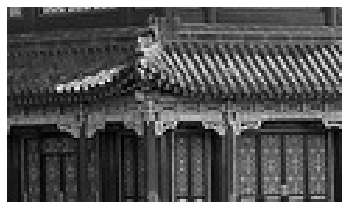

In [46]:
plot_image(images[0,:,:,0])
save_fig('china_original', tight_layout=False)
plt.show()

Saveing figure china_vertical


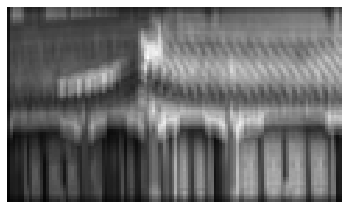

In [47]:
# 2장의 이미지 : 필터가 다르면 특싱도 다르게 잡힌다.
plot_image(output[0,:,:,0]) # 0번 필터 적용 : 세로줄
save_fig('china_vertical', tight_layout=False)
plt.show()

Saveing figure china_horizontal


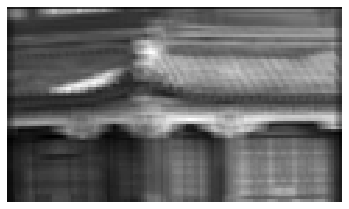

In [48]:
plot_image(output[0,:,:,1])
save_fig('china_horizontal', tight_layout=False)
plt.show()